In [3]:
import os


import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
# import seaborn as sns # used for plot interactive graph. 
# from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
# from sklearn.preprocessing import StandardScaler # for normalization
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline # pipeline making
# from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import SelectFromModel
# from sklearn import metrics # for the check the error and accuracy of the model
# from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
# import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.utils import to_categorical
# from keras.optimizers import SGD 
# from keras.callbacks import EarlyStopping
# from keras.utils import np_utils
# import itertools
# from keras.layers import LSTM
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.layers import Dropout


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
os.chdir('C:/Users/Olsen/Desktop/Masteroppgave')

In [5]:
# date,timestamp,hrv,dfa,sport,feeling,rpe

def replace_feeling(value):
    if value >= 5:
        return 1
    else:
        return 2



# Function to load and preprocess data from a single file
def load_and_preprocess(file_path, session):
    # df = pd.read_csv(file_path, sep=',', 
    #              parse_dates={'dt' : ['date', 'timestamp']}, infer_datetime_format=True, 
    #              low_memory=False, na_values=['nan','?'], index_col='dt')
    df = pd.read_csv(file_path, sep=',')

    droping_list_all=[]

    df = df.drop(columns=['sport', 'date'])
    for j in range(0,len(df.columns)):
        if not df.iloc[:, j].notnull().all():
            droping_list_all.append(j)        
            #print(df.iloc[:,j].unique())
    
    # filling nan with mean in any columns

    for j in range(0,len(df.columns)):        
            df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
    # another sanity check to make sure that there are not more any nan
    df.isnull().sum()



    # Add a new column to the DataFrame
    session_numbers = [session]*len(df['hrv'])  # Example values for the new column
    df['session'] = session_numbers
    # df2 = pd.DataFrame({"session": [session]*len(df['hrv'])})
    # df = df.append(df2, ignore_index = True)

    # for f in df['feeling']:
    #     if f >= 5:
    #         df['feeling'][f] = 1
    #     else:
    #         df['feeling'][f] = 2
    # df.feeling[df.feeling == 9] = 2
    # df.feeling[df.feeling == 7] = 2
    # df.feeling[df.feeling == 5] = 2
    # df.feeling[df.feeling == 3] = 1
    #df.feeling[df.feeling == 1] = 1
    # Applying the function to the 'feeling' column
    df['feeling'] = df['feeling'].apply(lambda x: replace_feeling(x))

    # print(df.dtypes)
    # print(df.shape)
    # print(df.describe())


    X = df[['session','timestamp', 'hrv', 'dfa']]
    y = df['feeling']

    # scaler = MinMaxScaler()
    # X = scaler.fit_transform(X)
    return X, y

# Function to load and preprocess data from multiple files in a folder
def load_data_from_folder(folder_path):
    X_all, y_all = [], []

    session = 1

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            X, y = load_and_preprocess(file_path, session)
            X_all.append(X)
            y_all.append(y)
            session += 1


    X_all = np.vstack(X_all)
    y_all = np.concatenate(y_all)

    return X_all, y_all


In [6]:
# Specify the folder containing your CSV files
train_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate2/csv_files"

# Load and preprocess data from multiple files in the folder
X_train, y_train = load_data_from_folder(train_folder)


# Specify the folder containing your CSV files
test_folder = "C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate1/csv_files"

# Load and preprocess data from multiple files in the folder
X_test, y_test = load_data_from_folder(test_folder)

print(X_train)
# print(X_test)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)



# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

[[1.00000000e+00 0.00000000e+00 1.03520000e+02 1.82174146e+00]
 [1.00000000e+00 1.00000000e+00 1.03860000e+02 1.75032626e+00]
 [1.00000000e+00 2.00000000e+00 1.04190000e+02 1.83079917e+00]
 ...
 [1.77000000e+02 4.62700000e+03 1.15340000e+02 1.24677653e+00]
 [1.77000000e+02 4.62800000e+03 1.15030000e+02 1.24677653e+00]
 [1.77000000e+02 4.62900000e+03 1.14740000e+02 1.24677653e+00]]


In [7]:

# df = pd.read_csv(file_path, sep=',', 
#                  parse_dates={'dt' : ['date', 'timestamp']}, infer_datetime_format=True, 
#                  low_memory=False, na_values=['nan','?'], index_col='dt')

# droping_list_all=[]

# df = df.drop(columns=['sport'])
# for j in range(0,len(df.columns)):
#     if not df.iloc[:, j].notnull().all():
#         droping_list_all.append(j)        
#         #print(df.iloc[:,j].unique())

# # filling nan with mean in any columns

# for j in range(0,len(df.columns)):        
#         df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
# # another sanity check to make sure that there are not more any nan
# df.isnull().sum()


# df.info()
# df.shape
# df.describe()


# for i in df['feeling']:
#     if i >= 3:
#         i = 1
#     else:
#         i = 2



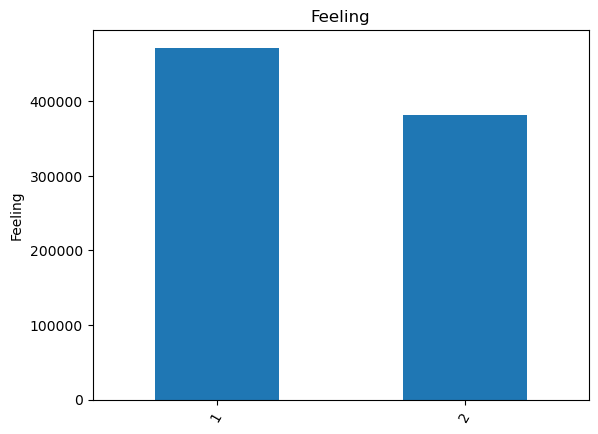

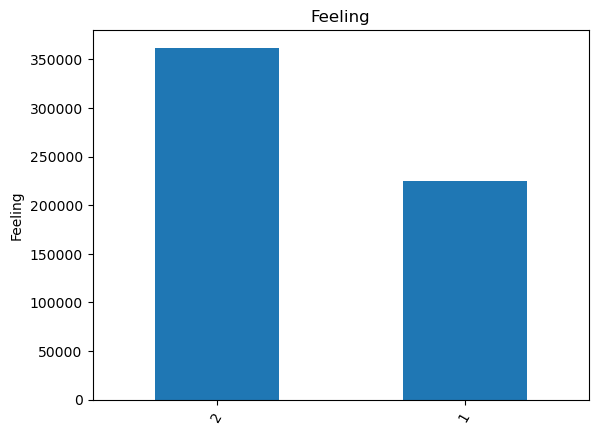

In [8]:
df = pd.DataFrame()
df['feeling_train'] = y_train
df.feeling_train.value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Feeling')
plt.title('Feeling')
plt.show()

df2 = pd.DataFrame()
df2['feeling_test'] = y_test
df2.feeling_test.value_counts().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Feeling')
plt.title('Feeling')
plt.show()


In [9]:
# Build the LSTM model
model = Sequential()
#model.add(LSTM(units=20, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(units=100,return_sequences=True,input_shape=(np.shape(X_train)[1],1)))
# model.add(Dense(units=1))  # Output layer

model.add(Dense(128, activation='relu', input_dim=35))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid', kernel_initializer="normal"))

# model.compile(optimizer='adam', loss='mean_squared_error')
model.compile('adam', 'mean_squared_error', metrics='accuracy')
# binary_crossentropy

model.summary()


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=70, shuffle=False)







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42000     
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 153873 (601.07 KB)
Trainable params: 153873 (601.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


1

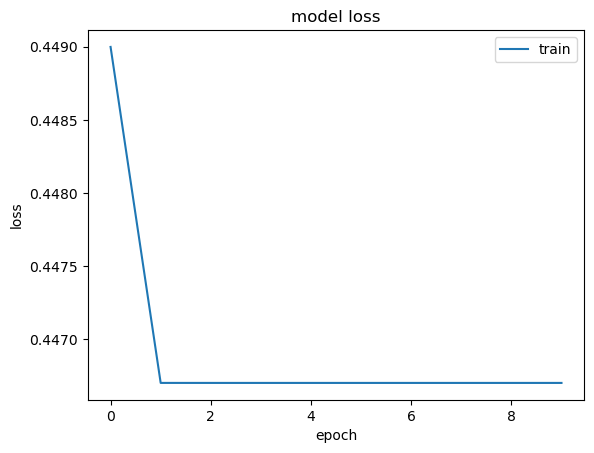

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
history.history

{'loss': [0.4489986002445221,
  0.44670334458351135,
  0.4467032551765442,
  0.4467032551765442,
  0.4467032551765442,
  0.4467032551765442,
  0.4467032551765442,
  0.4467032551765442,
  0.4467032551765442,
  0.4467032551765442],
 'accuracy': [0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558,
  0.5532967448234558]}

In [12]:

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest loss: ', test_loss)
print('\nTest accuracy: ', test_acc)


18339/18339 [==============================] - 41s 2ms/step - loss: 0.6173 - accuracy: 0.3827
Test Loss: [0.6172648668289185, 0.38273516297340393]
18339/18339 - 29s - loss: 0.6173 - accuracy: 0.3827 - 29s/epoch - 2ms/step

Test loss:  0.6172648668289185

Test accuracy:  0.38273516297340393


18339/18339 [==============================] - 40s 2ms/step


c:\Users\Olsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.38      1.00      0.55    224602
           2       0.00      0.00      0.00    362232

    accuracy                           0.38    586834
   macro avg       0.19      0.50      0.28    586834
weighted avg       0.15      0.38      0.21    586834



c:\Users\Olsen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


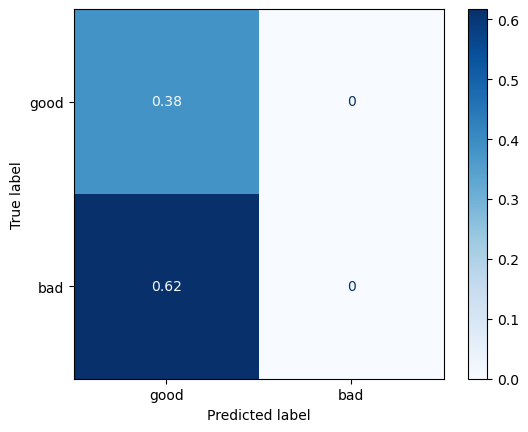

In [13]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
# predictions = model.predict(X_test)
result = confusion_matrix(y_test, predictions , normalize='pred')
print(classification_report(y_test, predictions))


disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=['good','bad'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [14]:
nsamples_train, nx_train, ny_train = X_train.shape
nsamples_test, nx_test, ny_test = X_test.shape
#print(nsamples, nx, ny)
X2_train = X_train.reshape((nsamples_train,nx_train*ny_train))
X2_test = X_test.reshape((nsamples_test,nx_test*ny_test))

Accuracy: 0.4742857434981613
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834

              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834



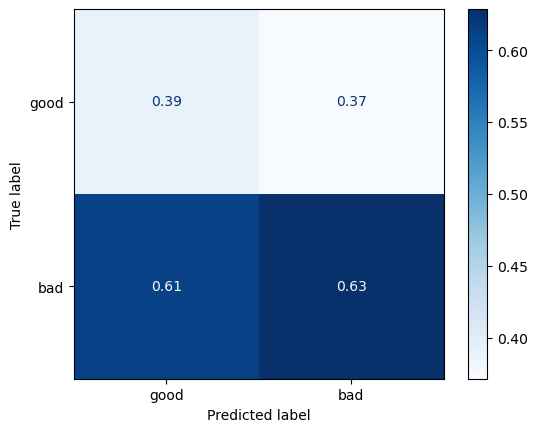

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=1, random_state=42)
rf_classifier.fit(X2_train, y_train)
y_pred = rf_classifier.predict(X2_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

result = confusion_matrix(y_test, y_pred , normalize='pred')
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=['good','bad'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 0.4742857434981613
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834

              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834



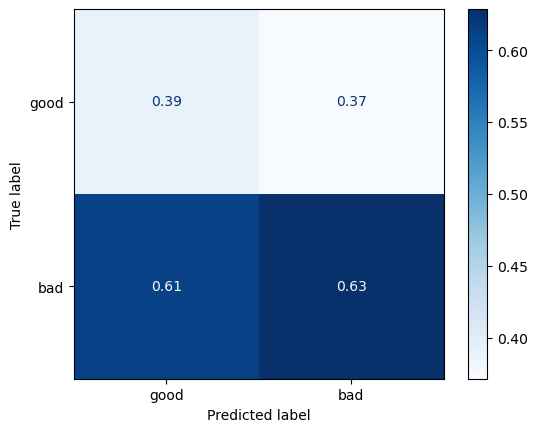

In [16]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X2_train, y_train)
y_pred = rf_classifier.predict(X2_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


result = confusion_matrix(y_test, y_pred , normalize='pred')
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=['good','bad'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 0.4742857434981613
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834

              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834



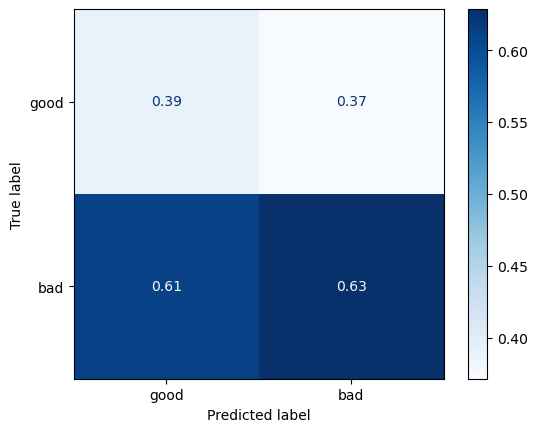

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=1000)
knn_classifier.fit(X2_train, y_train)
y_pred = rf_classifier.predict(X2_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


result = confusion_matrix(y_test, y_pred , normalize='pred')
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=['good','bad'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

Accuracy: 0.4742857434981613
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834

              precision    recall  f1-score   support

           1       0.39      0.65      0.49    224602
           2       0.63      0.36      0.46    362232

    accuracy                           0.47    586834
   macro avg       0.51      0.51      0.47    586834
weighted avg       0.54      0.47      0.47    586834



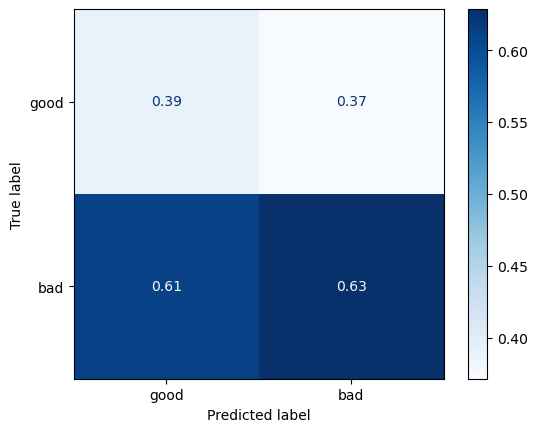

In [18]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X2_train, y_train)
y_pred = rf_classifier.predict(X2_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


result = confusion_matrix(y_test, y_pred , normalize='pred')
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=['good','bad'])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
# model.save('forTransferL.h5')